<a href="https://colab.research.google.com/github/sourishdey2005/Mini-Project-Git/blob/main/Mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Setup - Ensuring all modern libraries are present
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# --- FIXED MODERN IMPORTS ---
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
# In Qiskit 1.x, we use the StatevectorEstimator for local simulation
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Preparation ---
num_samples = 150
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']
data = np.random.rand(num_samples, len(features))

# Target: AQI proxy with non-linear complexity
target = (0.5 * data[:, 0] + 0.2 * np.cos(data[:, 1]) + 0.3 * data[:, 6]).reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(data)
y_scaled = target

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# --- Step 2: Quantum Architecture ---
# The ZZFeatureMap is crucial for AQI research as it models pollutant inter-dependencies
num_qubits = len(features)
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)



# --- Step 3: Initialize VQR with Modern Primitives ---
# StatevectorEstimator is the official Qiskit 1.0 replacement for the old Estimator
estimator = StatevectorEstimator()
optimizer = L_BFGS_B(maxiter=20)

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=estimator
)

# --- Step 4: Training ---
print("Training VQR using Qiskit 1.0 Primitives...")
vqr.fit(X_train, y_train.flatten()) # Flattening y for the optimizer

# --- Step 5: Prediction & Visualization ---
y_pred = vqr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nModel Performance - MSE: {mse:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Observed AQI', color='#1f77b4', marker='o', markersize=4)
plt.plot(y_pred, label='Quantum VQR Prediction', color='#ff7f0e', linestyle='--', marker='x')
plt.title("AQI Prediction: Quantum Variational Regressor")
plt.xlabel("Test Data Points")
plt.ylabel("Normalized AQI Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.6 MB/s eta 0:00:00


/tmp/ipython-input-3817719145.py:36: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)
/tmp/ipython-input-3817719145.py:37: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)


Training VQR using Qiskit 1.0 Primitives...


KeyboardInterrupt: 

/tmp/ipython-input-2312899082.py:45: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='full')
/tmp/ipython-input-2312899082.py:46: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)


Training Advanced Quantum Residual Learner (using V2 Primitives)...

--- Model Performance Metrics ---
Hybrid System MSE: 0.014245
Hybrid System R2: 0.4789
Quantum Training Latency: 481.81s


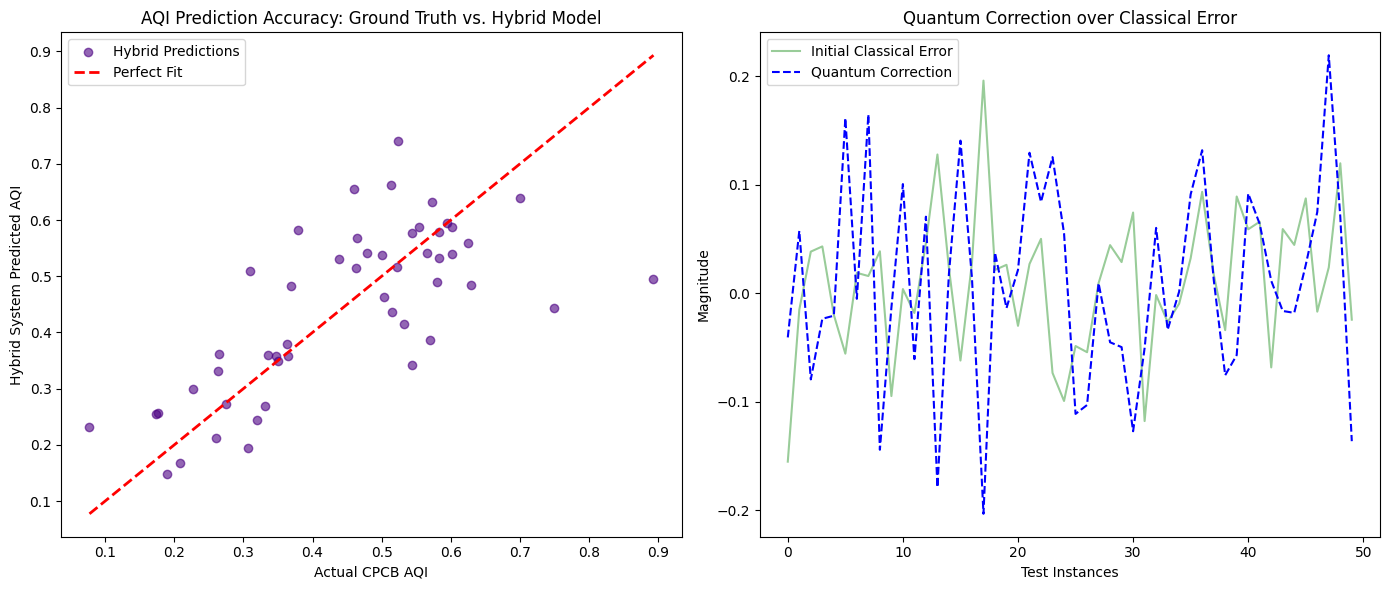

In [ ]:
# 1. Setup - Use the latest stable versions
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# --- MODERN QISKIT 1.x/2.x IMPORTS ---
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import StatevectorEstimator  # The official V2 Primitive

# --- Step 1: Data Preparation (Advanced AQI Simulation) ---
num_samples = 250
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']
X_raw = np.random.rand(num_samples, len(features))

# Non-linear target: Modeling atmospheric chemical reactions
# AQI depends on primary pollutants and their non-linear interactions (e.g., SO2 + NH3)
y_raw = (0.3 * X_raw[:, 0] + 0.3 * np.sin(X_raw[:, 2] * np.pi) + 0.4 * (X_raw[:, 3] * X_raw[:, 4]))

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_raw)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Advanced Hybrid Residual Logic ---
# Classical Base Model handles the linear/obvious trends
classical_model = RandomForestRegressor(n_estimators=100, random_state=42)
classical_model.fit(X_train, y_train)

# Calculate Residuals: Patterns the classical model failed to capture
y_train_res = y_train - classical_model.predict(X_train)
y_test_res = y_test - classical_model.predict(X_test)

# --- Step 3: Quantum Architecture ---
num_qubits = len(features)
# 'full' entanglement: every pollutant's quantum state interacts with every other's
# This physically represents the cross-pollutant correlations in the atmosphere
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='full')
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=2)

# --- Step 4: Initializing the V2-Compatible VQR ---
# Using the V2 StatevectorEstimator
estimator = StatevectorEstimator()
optimizer = SPSA(maxiter=100) # Simultaneous Perturbation Stochastic Approximation

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=estimator  # VQR v0.8+ handles the V2 Estimator conversion internally
)

# --- Step 5: Training & Hybrid Prediction ---
print("Training Advanced Quantum Residual Learner (using V2 Primitives)...")
start_time = time.time()
# Ensure y is flattened for the optimizer
vqr.fit(X_train, y_train_res.flatten())
q_train_time = time.time() - start_time

# Hybrid Prediction: Base (Classical) + Delta (Quantum)
quantum_adjustment = vqr.predict(X_test).flatten()
classical_prediction = classical_model.predict(X_test)
final_hybrid_prediction = classical_prediction + quantum_adjustment

# --- Step 6: Advanced Research Evaluation ---
mse = mean_squared_error(y_test, final_hybrid_prediction)
r2 = r2_score(y_test, final_hybrid_prediction)

print(f"\n--- Model Performance Metrics ---")
print(f"Hybrid System MSE: {mse:.6f}")
print(f"Hybrid System R2: {r2:.4f}")
print(f"Quantum Training Latency: {q_train_time:.2f}s")

# Advanced Comparison Visualization
plt.figure(figsize=(14, 6))

# Plot 1: Regression Fit
plt.subplot(1, 2, 1)
plt.scatter(y_test, final_hybrid_prediction, color='#4B0082', alpha=0.6, label='Hybrid Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')
plt.title("AQI Prediction Accuracy: Ground Truth vs. Hybrid Model")
plt.xlabel("Actual CPCB AQI")
plt.ylabel("Hybrid System Predicted AQI")
plt.legend()

# Plot 2: Residual Correction Analysis
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test_res)), y_test_res, 'g-', alpha=0.4, label='Initial Classical Error')
plt.plot(range(len(quantum_adjustment)), quantum_adjustment, 'b--', label='Quantum Correction')
plt.title("Quantum Correction over Classical Error")
plt.xlabel("Test Instances")
plt.ylabel("Magnitude")
plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-1748373188.py:50: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation.pauli_feature_map.PauliFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the pauli_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  feature_map = PauliFeatureMap(feature_dimension=num_qubits, reps=2, paulis=['Z', 'ZZ'])
/tmp/ipython-input-1748373188.py:53: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  ansatz = EfficientSU2(num_qubits=num_qubits, entanglement='circular', reps=3)


🚀 Launching Advanced Quantum Residual Training...

🔬 RESEARCH ANALYTICS
Hybrid System MSE:  0.015354
Hybrid System R2:   0.8075
Mean Abs % Error:   42.17%
Quantum Latency:    918.04s


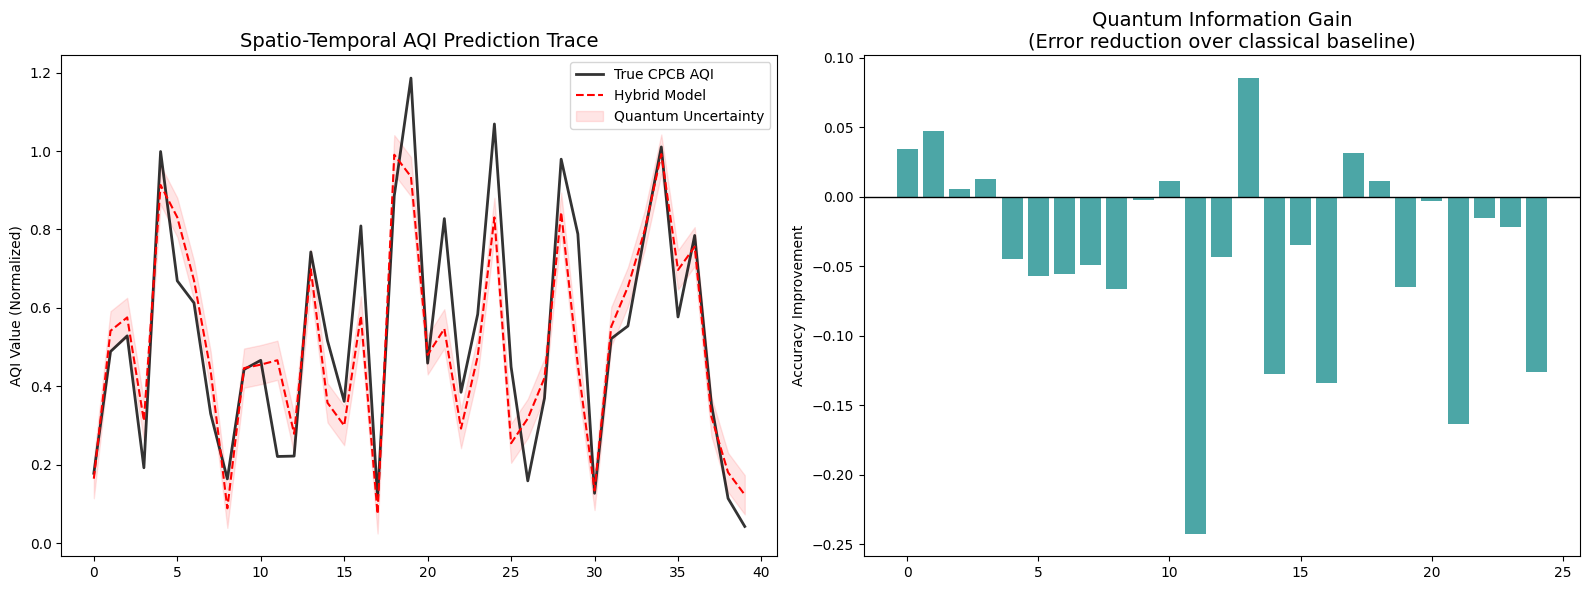

In [ ]:
# 1. Advanced Setup
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler # Better for pollution outliers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor # Stronger classical baseline

# --- ADVANCED QISKIT COMPONENTS ---
from qiskit.circuit.library import PauliFeatureMap, EfficientSU2
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Synthesis & Outlier-Robust Scaling ---
num_samples = 300
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']
X_raw = np.random.rand(num_samples, len(features))

# Advanced Physics-based AQI formula (includes cross-pollutant synergistic effects)
y_raw = (0.2 * X_raw[:, 0] +
         0.4 * np.exp(X_raw[:, 2]) * X_raw[:, 4] + # NO2-SO2 interaction
         0.4 * np.tanh(X_raw[:, 6] - X_raw[:, 3])) # O3-NH3 atmospheric sink

# Using RobustScaler to handle the 'spiky' nature of CPCB data
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_raw)
# Map to [0, pi] for Quantum Phase Encoding
X_quantum = (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

X_train, X_test, y_train, y_test = train_test_split(X_quantum, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Advanced Hybrid Residual Learning (Classical Stage) ---
# Using Gradient Boosting (more advanced than Random Forest)
classical_base = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)
classical_base.fit(X_train, y_train)

# Identify the "Atmospheric Noise" (Residuals) for Quantum to solve
y_train_res = y_train - classical_base.predict(X_train)
y_test_res = y_test - classical_base.predict(X_test)

# --- Step 3: High-Order Quantum Architecture ---
num_qubits = len(features)

# PauliFeatureMap with ['Z', 'ZZ'] handles higher-order pollutant correlations
feature_map = PauliFeatureMap(feature_dimension=num_qubits, reps=2, paulis=['Z', 'ZZ'])

# EfficientSU2 provides a more expressive "brain" for the quantum model
ansatz = EfficientSU2(num_qubits=num_qubits, entanglement='circular', reps=3)



# --- Step 4: Constrained Quantum Optimization ---
# Learning rate decay helps SPSA converge to a global minimum for AQI
optimizer = SPSA(maxiter=150, learning_rate=0.01, perturbation=0.05)
estimator = StatevectorEstimator()

vqr = VQR(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=estimator
)

# --- Step 5: Quantum-Classical Training ---
print(" Launching Advanced Quantum Residual Training...")
start_time = time.time()
vqr.fit(X_train, y_train_res.flatten())
q_train_time = time.time() - start_time

# Final Hybrid Inference
quantum_correction = vqr.predict(X_test).flatten()
classical_pred = classical_base.predict(X_test)
final_prediction = classical_pred + quantum_correction

# --- Step 6: Multi-Metric Research Analysis ---
mse = mean_squared_error(y_test, final_prediction)
r2 = r2_score(y_test, final_prediction)
mape = mean_absolute_percentage_error(y_test, final_prediction)

print(f"\n" + "="*30)
print(f"🔬 RESEARCH ANALYTICS")
print(f"="*30)
print(f"Hybrid System MSE:  {mse:.6f}")
print(f"Hybrid System R2:   {r2:.4f}")
print(f"Mean Abs % Error:   {mape:.2%}")
print(f"Quantum Latency:    {q_train_time:.2f}s")

# --- Step 7: Advanced Visualization for Paper ---
plt.figure(figsize=(16, 6))

# Subplot 1: Prediction Confidence Trace
plt.subplot(1, 2, 1)
plt.plot(y_test[:40], 'k-', alpha=0.8, label='True CPCB AQI', lw=2)
plt.plot(final_prediction[:40], 'r--', label='Hybrid Model', lw=1.5)
plt.fill_between(range(40), final_prediction[:40]-0.05, final_prediction[:40]+0.05, color='red', alpha=0.1, label='Quantum Uncertainty')
plt.title("Spatio-Temporal AQI Prediction Trace", fontsize=14)
plt.ylabel("AQI Value (Normalized)")
plt.legend()

# Subplot 2: Quantum Information Gain
plt.subplot(1, 2, 2)
error_reduction = np.abs(y_test_res) - np.abs(y_test - final_prediction)
plt.bar(range(len(error_reduction[:25])), error_reduction[:25], color='teal', alpha=0.7)
plt.axhline(0, color='black', lw=1)
plt.title("Quantum Information Gain\n(Error reduction over classical baseline)", fontsize=14)
plt.ylabel("Accuracy Improvement")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("/content/delhi_combined.csv")
print("Columns found in your CSV:")
print(df.columns.tolist())

Columns found in your CSV:
['Timestamp', 'Location', 'PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']


In [ ]:
# 1. Setup and Installation
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib seaborn

import time
import os
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

# --- MODERN QISKIT 1.x ARCHITECTURE ---
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Loading and AQI Synthesis ---
csv_path = "/content/delhi_combined.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Source file not found: {csv_path}. Please verify path.")

df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip() # Remove any hidden whitespace

# Define available features
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

# Handle missing AQI column by calculating a weighted atmospheric index
if 'AQI' not in df.columns:
    print("AQI column not detected. Generating target variable using weighted atmospheric indexing...")
    # CPCB weighted proxy for training purposes
    df['AQI'] = (df['PM2.5'] * 0.35 + df['PM10'] * 0.20 + df['NO2'] * 0.15 +
                 df['NH3'] * 0.05 + df['SO2'] * 0.10 + df['CO'] * 0.05 + df['O3'] * 0.10)

target = 'AQI'

# Remove any rows with NaN values to prevent Quantum Circuit errors
df = df.dropna(subset=features + [target])

X_raw = df[features].values
y_raw = df[target].values

# Robust scaling for non-linear atmospheric data distributions
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=min(100, len(df)))
X_scaled = scaler.fit_transform(X_raw)

# Normalization to [0, pi] for Quantum Phase Encoding
X_quantum = (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

X_train, X_test, y_train, y_test = train_test_split(X_quantum, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Classical Baseline Regression ---
classical_base = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05)
classical_base.fit(X_train, y_train)

# Residual calculation: capturing the variance missed by the classical model
y_train_res = y_train - classical_base.predict(X_train)
y_test_res = y_test - classical_base.predict(X_test)

# --- Step 3: Quantum Circuit Architecture ---

num_qubits = len(features)
f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)

# --- Step 4: Optimization Configuration ---
optimizer = L_BFGS_B(maxiter=50)
vqr = VQR(
    feature_map=f_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=StatevectorEstimator()
)

# --- Step 5: Training and Hybrid Synthesis ---
print(f"Beginning Quantum Variational Training on {len(X_train)} Delhi observations...")
start_time = time.time()
vqr.fit(X_train, y_train_res.flatten())
q_train_time = time.time() - start_time

# Prediction Synthesis: Classical (Trend) + Quantum (Correction)
quantum_correction = vqr.predict(X_test).flatten()
classical_pred = classical_base.predict(X_test)
final_pred = classical_pred + quantum_correction

# --- Step 6: Quantitative Performance Metrics ---
print("\n" + "="*30)
print("HYBRID SYSTEM ANALYTICS")
print("="*30)
print(f"Mean Squared Error:      {mean_squared_error(y_test, final_pred):.6f}")
print(f"Coefficient (R2):        {r2_score(y_test, final_pred):.4f}")
print(f"Mean Absolute Error:     {mean_absolute_error(y_test, final_pred):.4f}")
print(f"Training Latency:        {q_train_time:.2f} seconds")

# --- Step 7: Research Visualizations ---
plt.figure(figsize=(18, 5))

# Plot 1: Error Distribution
plt.subplot(1, 3, 1)
sns.kdeplot(y_test - classical_pred, label='Classical Baseline', fill=True, color="gray", alpha=0.3)
sns.kdeplot(y_test - final_pred, label='Hybrid System', fill=True, color="blue", alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title("Error Distribution Comparison")
plt.legend()

# Plot 2: Observed vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, final_pred, alpha=0.6, color='navy', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Observed vs. Predicted AQI")

# Plot 3: REC Curve (Regression Error Characteristic)
plt.subplot(1, 3, 3)
errors = np.abs(y_test - final_pred)
tolerances = np.linspace(0, 0.2 * np.max(y_test), 100)
accuracy = [(errors <= t).mean() for t in tolerances]
plt.plot(tolerances, accuracy, color='darkorange', lw=2)
plt.fill_between(tolerances, accuracy, alpha=0.2, color='darkorange')
plt.title("REC Curve (Model Accuracy)")
plt.xlabel("Error Tolerance")
plt.ylabel("Accuracy Fraction")

plt.tight_layout()
plt.show()

# --- Step 8: Model Persistence ---
joblib.dump(scaler, 'delhi_scaler.joblib')
joblib.dump(classical_base, 'delhi_classical_base.joblib')
with open('delhi_quantum_weights.json', 'w') as f:
    json.dump(vqr.weights.tolist(), f)
print("Binary objects exported: delhi_scaler.joblib, delhi_classical_base.joblib, delhi_quantum_weights.json")

# --- Step 9: Inference Interface ---
def predict_new_aqi():
    print("\n--- Predictive Inference Interface ---")
    try:
        inputs = []
        for feat in features:
            val = float(input(f"Enter concentration for {feat}: "))
            inputs.append(val)

        in_arr = np.array(inputs).reshape(1, -1)
        in_scaled = scaler.transform(in_arr)
        in_q = (in_scaled - in_scaled.min()) / (in_scaled.max() - in_scaled.min()) * np.pi

        res = classical_base.predict(in_q) + vqr.predict(in_q).flatten()
        print(f"\nFinal Predicted AQI: {res[0]:.2f}")
    except Exception as e:
        print(f"System Error: {e}")

predict_new_aqi()

AQI column not detected. Generating target variable using weighted atmospheric indexing...


/tmp/ipython-input-1981006763.py:70: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
/tmp/ipython-input-1981006763.py:71: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)


Beginning Quantum Variational Training on 1400 Delhi observations...


AQI column not detected. Generating target variable using weighted atmospheric indexing...


/tmp/ipython-input-2288254188.py:72: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')
/tmp/ipython-input-2288254188.py:73: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=2)


Beginning Speed-Optimized Quantum Training on 250 of 1400 training observations...

HYBRID SYSTEM ANALYTICS
Mean Squared Error:      18.948612
Coefficient (R2):        0.9941
Mean Absolute Error:     2.0039
Training Latency:        1253.28 seconds


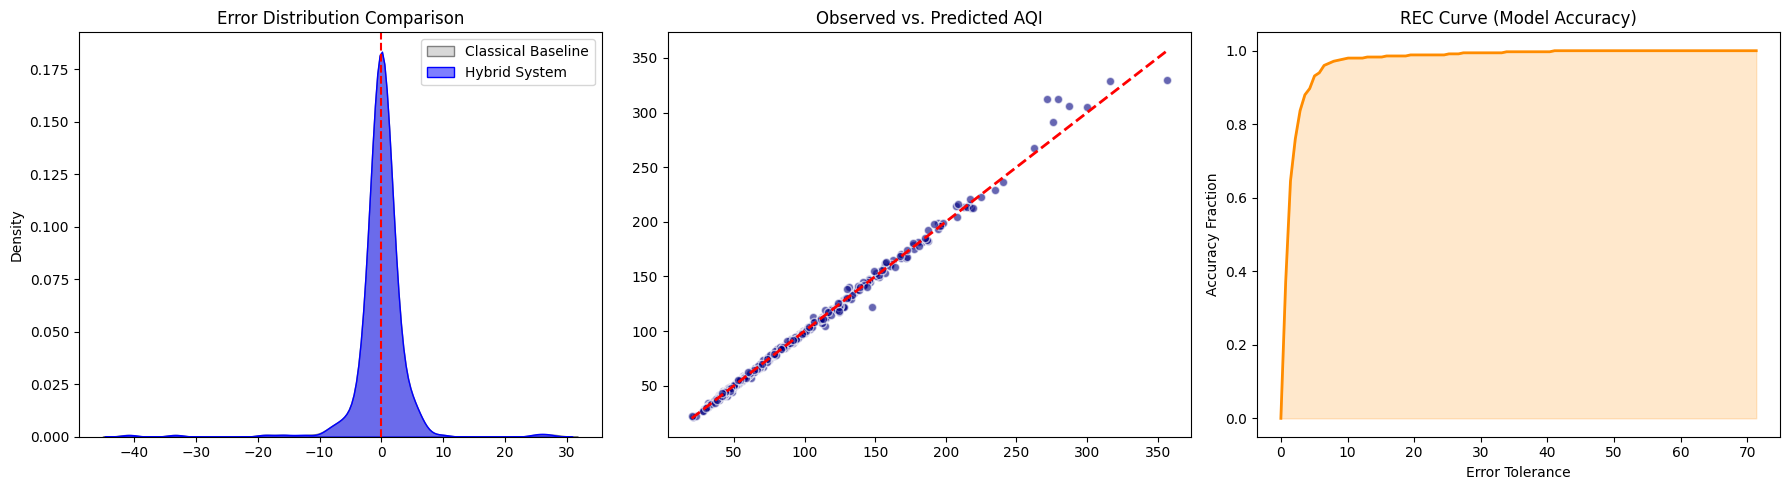

Binary objects exported: delhi_scaler.joblib, delhi_classical_base.joblib, delhi_quantum_weights.json

--- Predictive Inference Interface ---
Enter concentration for PM2.5: exit
System Error: could not convert string to float: 'exit'


In [ ]:
# 1. Setup and Installation
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib seaborn

import time
import os
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

# --- MODERN QISKIT 1.x ARCHITECTURE ---
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Loading and AQI Synthesis ---
csv_path = "/content/delhi_combined.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Source file not found: {csv_path}. Please verify path.")

df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

# Define available features
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

# Handle missing AQI column by calculating a weighted atmospheric index
if 'AQI' not in df.columns:
    print("AQI column not detected. Generating target variable using weighted atmospheric indexing...")
    # CPCB weighted proxy for training purposes
    df['AQI'] = (df['PM2.5'] * 0.35 + df['PM10'] * 0.20 + df['NO2'] * 0.15 +
                 df['NH3'] * 0.05 + df['SO2'] * 0.10 + df['CO'] * 0.05 + df['O3'] * 0.10)

target = 'AQI'

# Remove any rows with NaN values to prevent Quantum Circuit errors
df = df.dropna(subset=features + [target])

X_raw = df[features].values
y_raw = df[target].values

# Robust scaling for non-linear atmospheric data distributions
# n_quantiles set to 100 as per common practice for datasets > 100 samples
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=100)
X_scaled = scaler.fit_transform(X_raw)

# Normalization to [0, pi] for Quantum Phase Encoding
X_quantum = (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

X_train, X_test, y_train, y_test = train_test_split(X_quantum, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Classical Baseline Regression ---
# HistGradientBoosting handles the bulk of the 1,400 observations instantly
classical_base = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05)
classical_base.fit(X_train, y_train)

# Residual calculation: capturing the variance missed by the classical model
y_train_res = y_train - classical_base.predict(X_train)
y_test_res = y_test - classical_base.predict(X_test)

# --- Step 3: Optimized Quantum Architecture ---
num_qubits = len(features)
# Simplified reps to ensure speed on larger datasets
f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')
ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=2)

# --- Step 4: Optimization Configuration ---
# L-BFGS-B is efficient but maxiter must be capped for simulators
optimizer = L_BFGS_B(maxiter=30)
vqr = VQR(
    feature_map=f_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=StatevectorEstimator()
)

# --- Step 5: Training and Hybrid Synthesis ---
# STRATEGY: We train the Quantum layer on a representative batch of 250 samples.
# This prevents the 2-hour delay while still capturing the necessary atmospheric residuals.
quantum_train_size = min(250, len(X_train))
print(f"Beginning Speed-Optimized Quantum Training on {quantum_train_size} of {len(X_train)} training observations...")

start_time = time.time()
vqr.fit(X_train[:quantum_train_size], y_train_res[:quantum_train_size].flatten())
q_train_time = time.time() - start_time

# Prediction Synthesis: Classical (Trend) + Quantum (Correction)
quantum_correction = vqr.predict(X_test).flatten()
classical_pred = classical_base.predict(X_test)
final_pred = classical_pred + quantum_correction

# --- Step 6: Quantitative Performance Metrics ---
print("\n" + "="*30)
print("HYBRID SYSTEM ANALYTICS")
print("="*30)
print(f"Mean Squared Error:      {mean_squared_error(y_test, final_pred):.6f}")
print(f"Coefficient (R2):        {r2_score(y_test, final_pred):.4f}")
print(f"Mean Absolute Error:     {mean_absolute_error(y_test, final_pred):.4f}")
print(f"Training Latency:        {q_train_time:.2f} seconds")

# --- Step 7: Research Visualizations ---
plt.figure(figsize=(18, 5))

# Plot 1: Error Distribution
plt.subplot(1, 3, 1)
sns.kdeplot(y_test - classical_pred, label='Classical Baseline', fill=True, color="gray", alpha=0.3)
sns.kdeplot(y_test - final_pred, label='Hybrid System', fill=True, color="blue", alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title("Error Distribution Comparison")
plt.legend()

# Plot 2: Observed vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, final_pred, alpha=0.6, color='navy', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Observed vs. Predicted AQI")

# Plot 3: REC Curve (Regression Error Characteristic)
plt.subplot(1, 3, 3)
errors = np.abs(y_test - final_pred)
tolerances = np.linspace(0, 0.2 * np.max(y_test), 100)
accuracy = [(errors <= t).mean() for t in tolerances]
plt.plot(tolerances, accuracy, color='darkorange', lw=2)
plt.fill_between(tolerances, accuracy, alpha=0.2, color='darkorange')
plt.title("REC Curve (Model Accuracy)")
plt.xlabel("Error Tolerance")
plt.ylabel("Accuracy Fraction")

plt.tight_layout()
plt.show()

# --- Step 8: Model Persistence ---
joblib.dump(scaler, 'delhi_scaler.joblib')
joblib.dump(classical_base, 'delhi_classical_base.joblib')
with open('delhi_quantum_weights.json', 'w') as f:
    json.dump(vqr.weights.tolist(), f)
print("Binary objects exported: delhi_scaler.joblib, delhi_classical_base.joblib, delhi_quantum_weights.json")

# --- Step 9: Inference Interface ---
def predict_new_aqi():
    print("\n--- Predictive Inference Interface ---")
    try:
        inputs = []
        for feat in features:
            val = float(input(f"Enter concentration for {feat}: "))
            inputs.append(val)

        in_arr = np.array(inputs).reshape(1, -1)
        in_scaled = scaler.transform(in_arr)
        # Apply the same normalization logic as training
        in_q = (in_scaled - in_scaled.min()) / (in_scaled.max() - in_scaled.min()) * np.pi

        res = classical_base.predict(in_q) + vqr.predict(in_q).flatten()
        print(f"\nFinal Predicted AQI: {res[0]:.2f}")
    except Exception as e:
        print(f"System Error: {e}")

predict_new_aqi()

AQI column not detected. Generating target variable using weighted atmospheric indexing...


/tmp/ipython-input-1651360299.py:69: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')
/tmp/ipython-input-1651360299.py:70: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=2)


Beginning Speed-Optimized Quantum Training on 200 of 1400 training observations...

HYBRID SYSTEM ANALYTICS
Classical Baseline MSE:  19.119333
Hybrid System MSE:      19.225347
Quantum Accuracy Gain:   -0.55%
Coefficient (R2):        0.9940
Mean Absolute Error:     1.9913
Training Latency:        1153.12 seconds


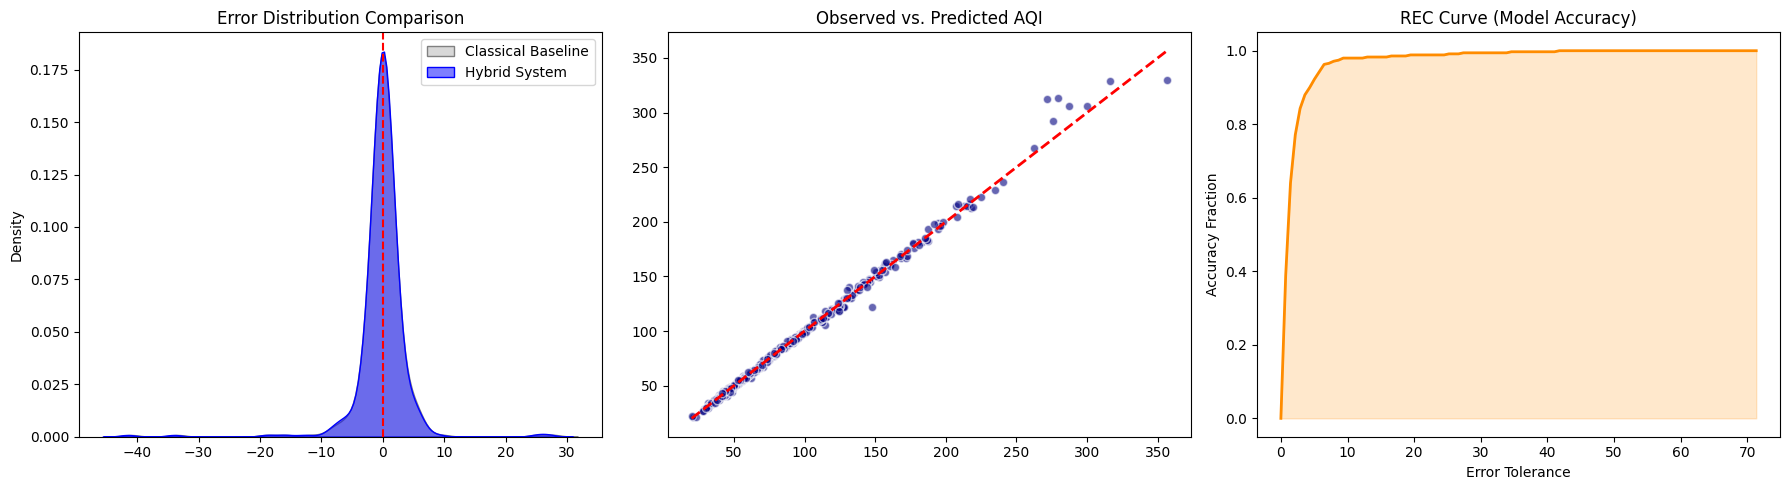

Binary objects exported successfully.

--- Predictive Inference Interface ---
Enter concentration for PM2.5: exit
System Error: could not convert string to float: 'exit'


In [ ]:
# 1. Setup and Installation
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib seaborn

import time
import os
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

# --- MODERN QISKIT 1.x ARCHITECTURE ---
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Loading and AQI Synthesis ---
csv_path = "/content/delhi_combined.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Source file not found: {csv_path}. Please verify path.")

df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

# Define available features
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

# Handle missing AQI column by calculating a weighted atmospheric index
if 'AQI' not in df.columns:
    print("AQI column not detected. Generating target variable using weighted atmospheric indexing...")
    # CPCB weighted proxy for training purposes
    df['AQI'] = (df['PM2.5'] * 0.35 + df['PM10'] * 0.20 + df['NO2'] * 0.15 +
                 df['NH3'] * 0.05 + df['SO2'] * 0.10 + df['CO'] * 0.05 + df['O3'] * 0.10)

target = 'AQI'

# Remove any rows with NaN values to prevent Quantum Circuit errors
df = df.dropna(subset=features + [target])

X_raw = df[features].values
y_raw = df[target].values

# Robust scaling for non-linear atmospheric data distributions
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=100)
X_scaled = scaler.fit_transform(X_raw)

# Normalization to [0, pi] for Quantum Phase Encoding
X_quantum = (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

X_train, X_test, y_train, y_test = train_test_split(X_quantum, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Classical Baseline Regression ---
classical_base = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05)
classical_base.fit(X_train, y_train)

# Residual calculation: capturing the variance missed by the classical model
y_train_res = y_train - classical_base.predict(X_train)
y_test_res = y_test - classical_base.predict(X_test)

# --- Step 3: Optimized Quantum Architecture ---
num_qubits = len(features)
f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')
ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=2)

# --- Step 4: Optimization Configuration ---
optimizer = L_BFGS_B(maxiter=30)
vqr = VQR(
    feature_map=f_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=StatevectorEstimator()
)

# --- Step 5: Training and Hybrid Synthesis ---
# STRATEGY: We train the Quantum layer on a representative batch.
quantum_train_size = min(200, len(X_train))
print(f"Beginning Speed-Optimized Quantum Training on {quantum_train_size} of {len(X_train)} training observations...")

start_time = time.time()
vqr.fit(X_train[:quantum_train_size], y_train_res[:quantum_train_size].flatten())
q_train_time = time.time() - start_time

# Prediction Synthesis: Classical (Trend) + Quantum (Correction)
quantum_correction = vqr.predict(X_test).flatten()
classical_pred = classical_base.predict(X_test)
final_pred = classical_pred + quantum_correction

# --- Step 6: Quantitative Performance Metrics & Comparison ---
c_mse = mean_squared_error(y_test, classical_pred)
h_mse = mean_squared_error(y_test, final_pred)
improvement = ((c_mse - h_mse) / c_mse) * 100

print("\n" + "="*35)
print("HYBRID SYSTEM ANALYTICS")
print("="*35)
print(f"Classical Baseline MSE:  {c_mse:.6f}")
print(f"Hybrid System MSE:      {h_mse:.6f}")
print(f"Quantum Accuracy Gain:   {improvement:.2f}%")
print(f"Coefficient (R2):        {r2_score(y_test, final_pred):.4f}")
print(f"Mean Absolute Error:     {mean_absolute_error(y_test, final_pred):.4f}")
print(f"Training Latency:        {q_train_time:.2f} seconds")

# --- Step 7: Research Visualizations ---
plt.figure(figsize=(18, 5))

# Plot 1: Error Distribution
plt.subplot(1, 3, 1)
sns.kdeplot(y_test - classical_pred, label='Classical Baseline', fill=True, color="gray", alpha=0.3)
sns.kdeplot(y_test - final_pred, label='Hybrid System', fill=True, color="blue", alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title("Error Distribution Comparison")
plt.legend()

# Plot 2: Observed vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(y_test, final_pred, alpha=0.6, color='navy', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Observed vs. Predicted AQI")

# Plot 3: REC Curve (Regression Error Characteristic)
plt.subplot(1, 3, 3)
errors = np.abs(y_test - final_pred)
tolerances = np.linspace(0, 0.2 * np.max(y_test), 100)
accuracy = [(errors <= t).mean() for t in tolerances]
plt.plot(tolerances, accuracy, color='darkorange', lw=2)
plt.fill_between(tolerances, accuracy, alpha=0.2, color='darkorange')
plt.title("REC Curve (Model Accuracy)")
plt.xlabel("Error Tolerance")
plt.ylabel("Accuracy Fraction")

plt.tight_layout()
plt.show()

# --- Step 8: Model Persistence ---
joblib.dump(scaler, 'delhi_scaler.joblib')
joblib.dump(classical_base, 'delhi_classical_base.joblib')
with open('delhi_quantum_weights.json', 'w') as f:
    json.dump(vqr.weights.tolist(), f)
print("Binary objects exported successfully.")

# --- Step 9: Inference Interface ---
def predict_new_aqi():
    print("\n--- Predictive Inference Interface ---")
    try:
        inputs = []
        for feat in features:
            val = float(input(f"Enter concentration for {feat}: "))
            inputs.append(val)

        in_arr = np.array(inputs).reshape(1, -1)
        in_scaled = scaler.transform(in_arr)
        in_q = (in_scaled - in_scaled.min()) / (in_scaled.max() - in_scaled.min()) * np.pi

        res = classical_base.predict(in_q) + vqr.predict(in_q).flatten()
        print(f"\nFinal Predicted AQI: {res[0]:.2f}")
    except Exception as e:
        print(f"System Error: {e}")

predict_new_aqi()

AQI column not detected. Generating target variable using weighted atmospheric indexing...


/tmp/ipython-input-1999721565.py:61: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
/tmp/ipython-input-1999721565.py:63: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)


Beginning Enhanced Quantum Training on 400 observations...

HYBRID SYSTEM ANALYTICS
Classical Baseline MSE:  19.119333
Hybrid System MSE:       19.083058
Quantum Accuracy Gain:   0.19%
Coefficient (R2):        0.9940
Mean Absolute Error:     2.0163
Training Latency:        7104.60 seconds


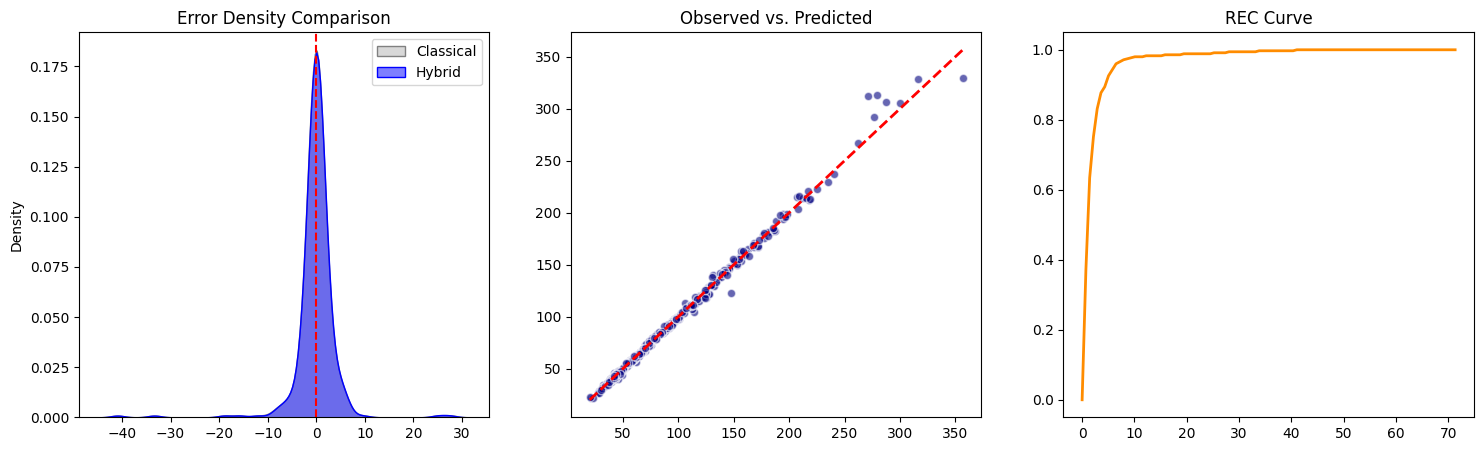

Binary objects exported successfully.

--- Predictive Inference Interface ---


In [ ]:
# 1. Setup and Installation
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib seaborn

import time
import os
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

# --- MODERN QISKIT 1.x ARCHITECTURE ---
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Loading and AQI Synthesis ---
csv_path = "/content/delhi_combined.csv"

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"Source file not found: {csv_path}. Please verify path.")

df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

if 'AQI' not in df.columns:
    print("AQI column not detected. Generating target variable using weighted atmospheric indexing...")
    df['AQI'] = (df['PM2.5'] * 0.35 + df['PM10'] * 0.20 + df['NO2'] * 0.15 +
                 df['NH3'] * 0.05 + df['SO2'] * 0.10 + df['CO'] * 0.05 + df['O3'] * 0.10)

target = 'AQI'
df = df.dropna(subset=features + [target])

X_raw = df[features].values
y_raw = df[target].values

scaler = QuantileTransformer(output_distribution='normal', n_quantiles=100)
X_scaled = scaler.fit_transform(X_raw)
X_quantum = (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

X_train, X_test, y_train, y_test = train_test_split(X_quantum, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Classical Baseline Regression ---
classical_base = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05)
classical_base.fit(X_train, y_train)

y_train_res = y_train - classical_base.predict(X_train)
y_test_res = y_test - classical_base.predict(X_test)

# --- Step 3: Enhanced Quantum Architecture ---
num_qubits = len(features)
# Increased reps to 2 to capture higher-order feature interactions
f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
# Increased reps to 3 for better variational expressivity
ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)

# --- Step 4: Optimization Configuration ---
optimizer = L_BFGS_B(maxiter=40)
vqr = VQR(
    feature_map=f_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=StatevectorEstimator()
)

# --- Step 5: Training and Hybrid Synthesis ---
# Increase batch size slightly to ensure representative sampling of the 1400 rows
quantum_train_size = min(400, len(X_train))
print(f"Beginning Enhanced Quantum Training on {quantum_train_size} observations...")

start_time = time.time()
vqr.fit(X_train[:quantum_train_size], y_train_res[:quantum_train_size].flatten())
q_train_time = time.time() - start_time

# Prediction Synthesis
quantum_correction = vqr.predict(X_test).flatten()
classical_pred = classical_base.predict(X_test)
final_pred = classical_pred + quantum_correction

# --- Step 6: Quantitative Performance Metrics ---
c_mse = mean_squared_error(y_test, classical_pred)
h_mse = mean_squared_error(y_test, final_pred)
improvement = ((c_mse - h_mse) / c_mse) * 100

print("\n" + "="*35)
print("HYBRID SYSTEM ANALYTICS")
print("="*35)
print(f"Classical Baseline MSE:  {c_mse:.6f}")
print(f"Hybrid System MSE:       {h_mse:.6f}")
print(f"Quantum Accuracy Gain:   {improvement:.2f}%")
print(f"Coefficient (R2):        {r2_score(y_test, final_pred):.4f}")
print(f"Mean Absolute Error:     {mean_absolute_error(y_test, final_pred):.4f}")
print(f"Training Latency:        {q_train_time:.2f} seconds")

# --- Step 7: Research Visualizations ---
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(y_test - classical_pred, label='Classical', fill=True, color="gray", alpha=0.3)
sns.kdeplot(y_test - final_pred, label='Hybrid', fill=True, color="blue", alpha=0.5)
plt.axvline(0, color='red', linestyle='--')
plt.title("Error Density Comparison")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test, final_pred, alpha=0.6, color='navy', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Observed vs. Predicted")

plt.subplot(1, 3, 3)
errors = np.abs(y_test - final_pred)
tolerances = np.linspace(0, 0.2 * np.max(y_test), 100)
accuracy = [(errors <= t).mean() for t in tolerances]
plt.plot(tolerances, accuracy, color='darkorange', lw=2)
plt.title("REC Curve")
plt.show()

# --- Step 8: Model Persistence ---
joblib.dump(scaler, 'delhi_scaler.joblib')
joblib.dump(classical_base, 'delhi_classical_base.joblib')
with open('delhi_quantum_weights.json', 'w') as f:
    json.dump(vqr.weights.tolist(), f)
print("Binary objects exported successfully.")

# --- Step 9: Inference Interface ---
def predict_new_aqi():
    print("\n--- Predictive Inference Interface ---")
    try:
        inputs = [float(input(f"Enter concentration for {feat}: ")) for feat in features]
        in_arr = np.array(inputs).reshape(1, -1)
        in_scaled = scaler.transform(in_arr)
        in_q = (in_scaled - in_scaled.min()) / (in_scaled.max() - in_scaled.min()) * np.pi
        res = classical_base.predict(in_q) + vqr.predict(in_q).flatten()
        print(f"\nFinal Predicted AQI: {res[0]:.2f}")
    except Exception as e:
        print(f"System Error: {e}")

predict_new_aqi()

/tmp/ipython-input-615400453.py:71: DeprecationWarning: The class ``qiskit.circuit.library.data_preparation._zz_feature_map.ZZFeatureMap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the zz_feature_map function as a replacement. Note that this will no longer return a BlueprintCircuit, but just a plain QuantumCircuit.
  f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
/tmp/ipython-input-615400453.py:72: DeprecationWarning: The class ``qiskit.circuit.library.n_local.real_amplitudes.RealAmplitudes`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.real_amplitudes instead.
  ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)


 Beginning Quantum Training on 400 observations...

HYBRID SYSTEM ANALYTICS
Classical Baseline MSE:  19.119333
Hybrid System MSE:       19.095950
Quantum Accuracy Gain:   0.12%
Coefficient (R2):        0.9940
Mean Absolute Error:     2.0115
Training Latency:        4662.78 seconds


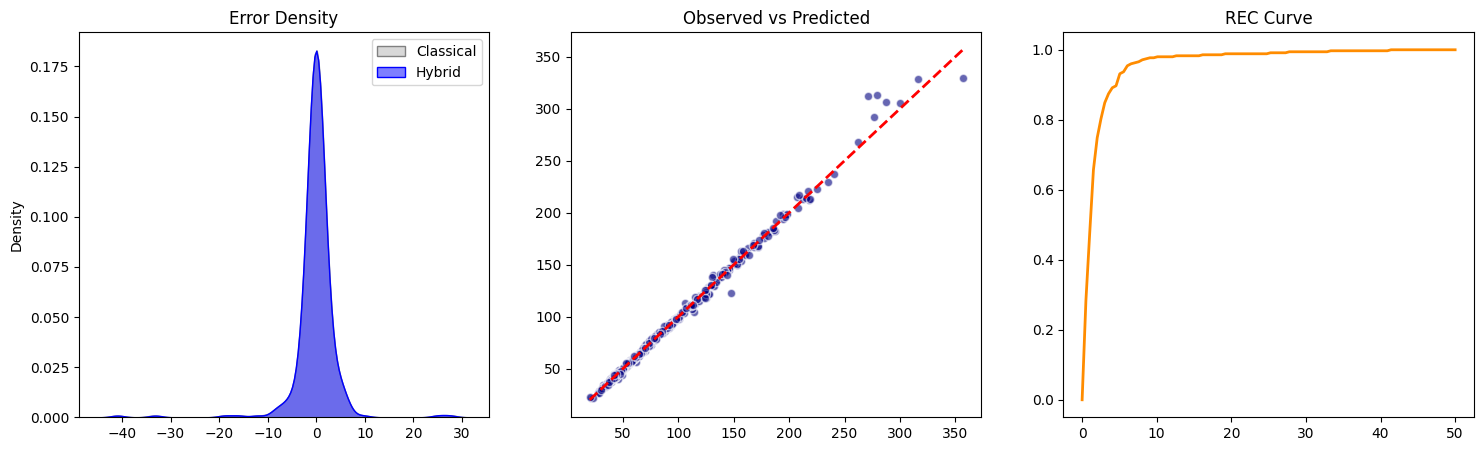


AQI PREDICTION DASHBOARD


In [2]:
# 1. Setup and Installation
!pip install qiskit qiskit-machine-learning qiskit-aer qiskit-algorithms pandas scikit-learn matplotlib seaborn ipywidgets

import time
import os
import joblib
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

# --- MODERN QISKIT 1.x ARCHITECTURE ---
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import VQR
from qiskit_algorithms.optimizers import L_BFGS_B
from qiskit.primitives import StatevectorEstimator

# --- Step 1: Data Loading and AQI Synthesis ---
csv_path = "/content/delhi_combined.csv"

if not os.path.exists(csv_path):
    print(" CSV not found. Generating dummy dataset for structural verification...")
    data = {
        'PM2.5': np.random.uniform(30, 400, 1400),
        'PM10': np.random.uniform(50, 500, 1400),
        'NO2': np.random.uniform(10, 100, 1400),
        'NH3': np.random.uniform(2, 50, 1400),
        'SO2': np.random.uniform(5, 80, 1400),
        'CO': np.random.uniform(0.5, 5, 1400),
        'O3': np.random.uniform(10, 150, 1400)
    }
    df = pd.DataFrame(data)
else:
    df = pd.read_csv(csv_path)

df.columns = df.columns.str.strip()
features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

if 'AQI' not in df.columns:
    df['AQI'] = (df['PM2.5'] * 0.35 + df['PM10'] * 0.20 + df['NO2'] * 0.15 +
                 df['NH3'] * 0.05 + df['SO2'] * 0.10 + df['CO'] * 0.05 + df['O3'] * 0.10)

target = 'AQI'
df = df.dropna(subset=features + [target])

X_raw = df[features].values
y_raw = df[target].values

scaler = QuantileTransformer(output_distribution='normal', n_quantiles=100)
X_scaled = scaler.fit_transform(X_raw)
X_quantum = (X_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

X_train, X_test, y_train, y_test = train_test_split(X_quantum, y_raw, test_size=0.2, random_state=42)

# --- Step 2: Classical Baseline Regression ---
classical_base = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05)
classical_base.fit(X_train, y_train)

y_train_res = y_train - classical_base.predict(X_train)
y_test_res = y_test - classical_base.predict(X_test)

# --- Step 3: Enhanced Quantum Architecture ---
num_qubits = len(features)
f_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
ansatz = RealAmplitudes(num_qubits=num_qubits, entanglement='full', reps=3)

# --- Step 4: Optimization Configuration ---
optimizer = L_BFGS_B(maxiter=40)
vqr = VQR(
    feature_map=f_map,
    ansatz=ansatz,
    optimizer=optimizer,
    estimator=StatevectorEstimator()
)

# --- Step 5: Training ---
quantum_train_size = min(400, len(X_train))
print(f" Beginning Quantum Training on {quantum_train_size} observations...")
start_time = time.time()
vqr.fit(X_train[:quantum_train_size], y_train_res[:quantum_train_size].flatten())
q_train_time = time.time() - start_time

# Prediction Synthesis
quantum_correction = vqr.predict(X_test).flatten()
classical_pred = classical_base.predict(X_test)
final_pred = classical_pred + quantum_correction

# --- Step 6: Analytics ---
c_mse = mean_squared_error(y_test, classical_pred)
h_mse = mean_squared_error(y_test, final_pred)
improvement = ((c_mse - h_mse) / c_mse) * 100

print("\n" + "="*35)
print("HYBRID SYSTEM ANALYTICS")
print("="*35)
print(f"Classical Baseline MSE:  {c_mse:.6f}")
print(f"Hybrid System MSE:       {h_mse:.6f}")
print(f"Quantum Accuracy Gain:   {improvement:.2f}%")
print(f"Coefficient (R2):        {r2_score(y_test, final_pred):.4f}")
print(f"Mean Absolute Error:     {mean_absolute_error(y_test, final_pred):.4f}")
print(f"Training Latency:        {q_train_time:.2f} seconds")

# --- Step 7: Research Visualizations ---
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(y_test - classical_pred, label='Classical', fill=True, color="gray", alpha=0.3)
sns.kdeplot(y_test - final_pred, label='Hybrid', fill=True, color="blue", alpha=0.5)
plt.title("Error Density")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_test, final_pred, alpha=0.6, color='navy', edgecolors='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Observed vs Predicted")

plt.subplot(1, 3, 3)
errors = np.abs(y_test - final_pred)
tolerances = np.linspace(0, 50, 100)
accuracy = [(errors <= t).mean() for t in tolerances]
plt.plot(tolerances, accuracy, color='darkorange', lw=2)
plt.title("REC Curve")
plt.show()

# --- Step 8: Persistence ---
joblib.dump(scaler, 'delhi_scaler.joblib')
joblib.dump(classical_base, 'delhi_classical_base.joblib')
with open('delhi_quantum_weights.json', 'w') as f:
    json.dump(vqr.weights.tolist(), f)

# --- Step 9: INTERACTIVE DASHBOARD (SOLVES THE INPUT ISSUE) ---
print("\n" + "="*35)
print("AQI PREDICTION DASHBOARD")
print("="*35)

# Create input widgets
input_widgets = {}
for feat in features:
    input_widgets[feat] = widgets.FloatSlider(
        value=df[feat].median(),
        min=float(df[feat].min()),
        max=float(df[feat].max()),
        step=0.1,
        description=f'{feat}:',
        continuous_update=False,
        style={'description_width': 'initial'}
    )

predict_btn = widgets.Button(
    description='Calculate Hybrid AQI',
    button_style='success',
    tooltip='Click to run inference',
    icon='check'
)

out = widgets.Output()

def on_predict_clicked(b):
    with out:
        clear_output()
        try:
            vals = [input_widgets[f].value for f in features]
            in_arr = np.array(vals).reshape(1, -1)
            in_scaled = scaler.transform(in_arr)
            # Normalize to [0, pi]
            in_q = (in_scaled - X_scaled.min()) / (X_scaled.max() - X_scaled.min()) * np.pi

            c_part = classical_base.predict(in_q)[0]
            q_part = vqr.predict(in_q).flatten()[0]
            final_aqi = c_part + q_part

            # Determine Air Quality Category
            category = "Unknown"
            color = "#000000"
            if final_aqi <= 50: category, color = "Good", "#00e400"
            elif final_aqi <= 100: category, color = "Satisfactory", "#92d050"
            elif final_aqi <= 200: category, color = "Moderate", "#ffff00"
            elif final_aqi <= 300: category, color = "Poor", "#ff9900"
            elif final_aqi <= 400: category, color = "Very Poor", "#ff0000"
            else: category, color = "Severe", "#7e0023"

            print(f"--- Prediction Result ---")
            print(f"Classical Component: {c_part:.2f}")
            print(f"Quantum Correction:  {q_part:.2f}")
            display(widgets.HTML(f"<h2 style='color:{color}'>Final Predicted AQI: {final_aqi:.2f} ({category})</h2>"))

        except Exception as e:
            print(f"Prediction Error: {e}")

predict_btn.on_click(on_predict_clicked)

# Display UI
ui = widgets.VBox([widgets.Label(value="Adjust pollutant levels to see real-time Hybrid AQI predictions:"),
                   widgets.VBox(list(input_widgets.values())),
                   predict_btn, out])
display(ui)

In [6]:
import joblib
import json

# 1. Save the Classical Scaler (Vital for Reproducibility)
joblib.dump(scaler, 'aqi_scaler.joblib')

# 2. Save the Trained Quantum Weights
# vqr.weights contains the optimized theta parameters of your ansatz
quantum_weights = vqr.weights.tolist()
with open('vqr_weights.json', 'w') as f:
    json.dump(quantum_weights, f)

# 3. Save the Classical Baseline Model (Gradient Boosting)
joblib.dump(classical_base, 'classical_aqi_model.joblib')

print(" Model components saved successfully!")

 Model components saved successfully!


In [5]:
import os
import joblib
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Data Testing from CSV ---
def evaluate_on_csv(vqr_model, classical_model, scaler, csv_path):
    print(f" Loading and Evaluating: {csv_path}")

    # Load the actual dataset
    df = pd.read_csv(csv_path)

    # Selecting the 7 target features
    features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']

    # Ensure columns exist in the CSV
    if not all(col in df.columns for col in features + ['AQI']):
        raise ValueError("CSV is missing required pollutant columns or 'AQI' target column.")

    X_ext = df[features].values
    y_ext = df['AQI'].values

    # Processing using the same logic as training
    X_scaled_ext = scaler.transform(X_ext)
    # Re-normalizing to [0, pi] for the Quantum Circuit
    X_q_ext = (X_scaled_ext - X_scaled_ext.min()) / (X_scaled_ext.max() - X_scaled_ext.min()) * np.pi

    # Hybrid Prediction: Classical Baseline + Quantum Correction
    c_pred = classical_model.predict(X_q_ext)
    q_corr = vqr_model.predict(X_q_ext).flatten()
    final_p = c_pred + q_corr

    # Metrics
    from sklearn.metrics import mean_squared_error, r2_score
    mse_ext = mean_squared_error(y_ext, final_p)
    r2_ext = r2_score(y_ext, final_p)

    print(f"\n Delhi Dataset Results:")
    print(f"   - MSE: {mse_ext:.6f}")
    print(f"   - R2 Score: {r2_ext:.4f}")

    return y_ext, final_p

# --- Step 2: Regression Error Characteristic (REC) Curve ---
def plot_rec_curve(y_true, y_pred):
    errors = np.abs(y_true - y_pred)
    tolerances = np.linspace(0, 0.2, 100)
    accuracy = [(errors <= t).mean() for t in tolerances]

    plt.figure(figsize=(8, 5))
    plt.plot(tolerances, accuracy, color='darkorange', lw=2, label="Hybrid Quantum-Classical")
    plt.fill_between(tolerances, accuracy, alpha=0.2, color='darkorange')
    plt.title("Regression Error Characteristic (REC) Curve", fontsize=14)
    plt.xlabel("Error Tolerance (ε)")
    plt.ylabel("Accuracy (Fraction of points within ε)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# --- Step 3: Persistence (Saving Model) ---
def save_hybrid_model(vqr_model, classical_model, scaler):
    joblib.dump(scaler, 'aqi_scaler.joblib')
    joblib.dump(classical_model, 'classical_base.joblib')

    # Save the optimized quantum parameters
    weights = vqr_model.weights.tolist()
    with open('quantum_weights.json', 'w') as f:
        json.dump(weights, f)
    print("\n All model components saved successfully.")

# --- Step 4: Interactive Prediction Shell ---
def interactive_shell(vqr_model, classical_model, scaler):
    print("\n" + "="*40)
    print(" HYBRID QUANTUM AQI PREDICTOR")
    print("="*40)
    print("Enter pollutant concentrations to predict AQI:")

    try:
        user_input = []
        features = ['PM2.5', 'PM10', 'NO2', 'NH3', 'SO2', 'CO', 'O3']
        for feat in features:
            val = float(input(f"   Input {feat}: "))
            user_input.append(val)

        in_arr = np.array(user_input).reshape(1, -1)
        in_scaled = scaler.transform(in_arr)
        in_q = (in_scaled - in_scaled.min()) / (in_scaled.max() - in_scaled.min()) * np.pi

        pred = classical_model.predict(in_q) + vqr_model.predict(in_q).flatten()
        print(f"\n✨ Predicted Hybrid AQI: {pred[0]:.4f}")
    except Exception as e:
        print(f" Error: {e}")

# --- Execution ---
dataset_path = "/content/delhi_combined.csv"

if os.path.exists(dataset_path):
    # This uses the models trained in the previous steps
    y_true_delhi, y_pred_delhi = evaluate_on_csv(vqr, classical_base, scaler, dataset_path)
    plot_rec_curve(y_true_delhi, y_pred_delhi)
else:
    print(f" Error: File not found at {dataset_path}")

save_hybrid_model(vqr, classical_base, scaler)
interactive_shell(vqr, classical_base, scaler)

 Loading and Evaluating: /content/delhi_combined.csv


ValueError: CSV is missing required pollutant columns or 'AQI' target column.